<a href="https://colab.research.google.com/github/whoIsOneZero/ransomware_detection_mitigation/blob/main/notebooks/random_forest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ransomware Classification with RANDOM FOREST**

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RansomwareData.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, 10001 to 0.30934
dtypes: int64(30970)
memory usage: 359.9 MB


In [ ]:
df.columns = [f'col_{i}' for i in range(df.shape[1])]

In [ ]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_30960,col_30961,col_30962,col_30963,col_30964,col_30965,col_30966,col_30967,col_30968,col_30969
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'Dataset shape: {df.shape}')

Dataset shape: (1523, 30970)


In [ ]:
# Check for missing values
print(df.isnull().sum())

col_0        0
col_1        0
col_2        0
col_3        0
col_4        0
            ..
col_30965    0
col_30966    0
col_30967    0
col_30968    0
col_30969    0
Length: 30970, dtype: int64


In [ ]:
if 'col_0' in df.columns:
  df.drop('col_0',inplace=True, axis=1) # drop IDs

if 'col_2' in df.columns:
  df.drop('col_2',inplace=True, axis=1) # drop Ransomware family

X = df.drop('col_1',axis=1) # features
y = df['col_1'] # labels

# 90% {training+validation}, 10% test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 70% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
X.head()

,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,...,col_30960,col_30961,col_30962,col_30963,col_30964,col_30965,col_30966,col_30967,col_30968,col_30969
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# rfc = RandomForestClassifier(n_estimators=500)
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
# Making predictions on the validation set
predictions = rfc.predict(X_val)

In [ ]:
# Classification report on validation set
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.98      0.99       117

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



In [ ]:
# Confusion matrix on validation set
print(confusion_matrix(y_val,predictions))

[[156   1]
 [  2 115]]


# RESULTS PLOTS

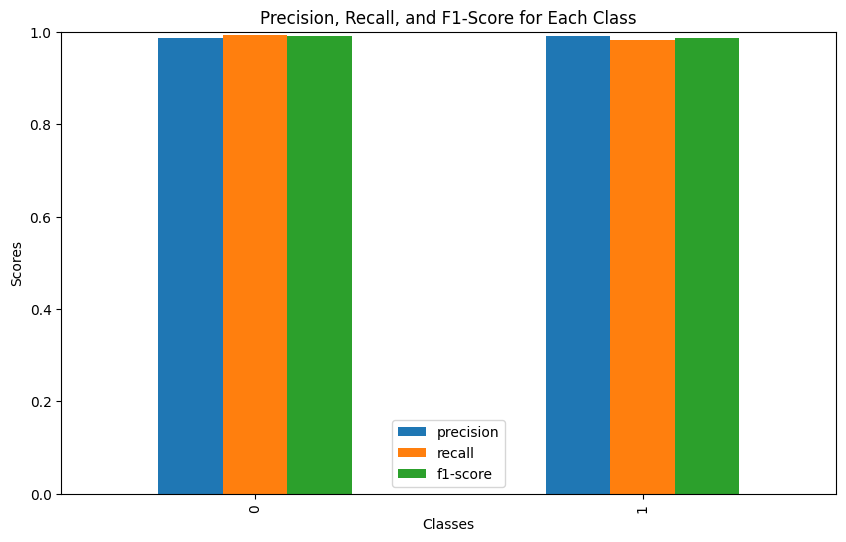

In [ ]:
# Get the classification report as a dictionary
report = classification_report(y_val, predictions, output_dict=True)

# Convert the report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot the KPIs
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.show()

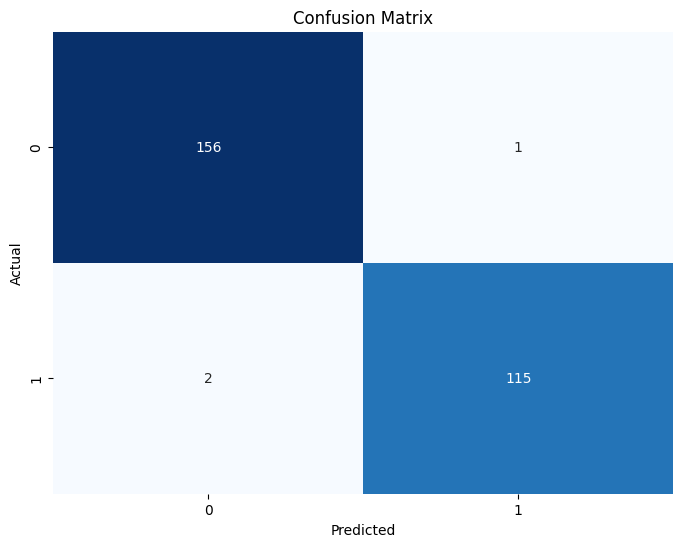

In [ ]:
# Calculate confusion matrix (validation set)
cm_val = confusion_matrix(y_val,predictions)
# print(cm_val)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

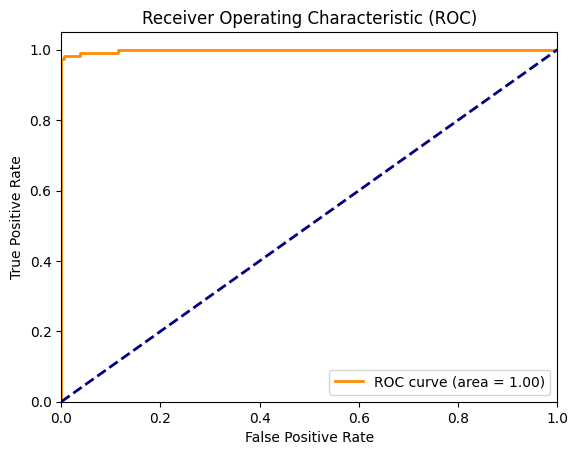

In [ ]:
# Get probability estimates
y_proba = rfc.predict_proba(X_val)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Make predictions on test set
y_pred_test = rfc.predict(X_test)

In [ ]:
# Classification report on test set
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.97      0.95      0.96        60

    accuracy                           0.97       153
   macro avg       0.97      0.96      0.97       153
weighted avg       0.97      0.97      0.97       153



In [ ]:
# Confusion matrix on test set
print(confusion_matrix(y_test,y_pred_test))

[[91  2]
 [ 3 57]]


# OPTIMIZATION